In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
trainPath = '/home/marcin/git_workspace/roads_semantic_segmentation_in_LandCover.ai_dataset/data/processed/train'
imgName = 'N-34-140-A-d-4-2_310.jpg'
maskName = 'N-34-140-A-d-4-2_310_m.png'

imgPath = '{}/{}'.format(trainPath, imgName)
maskPath = '{}/{}'.format(trainPath, maskName)

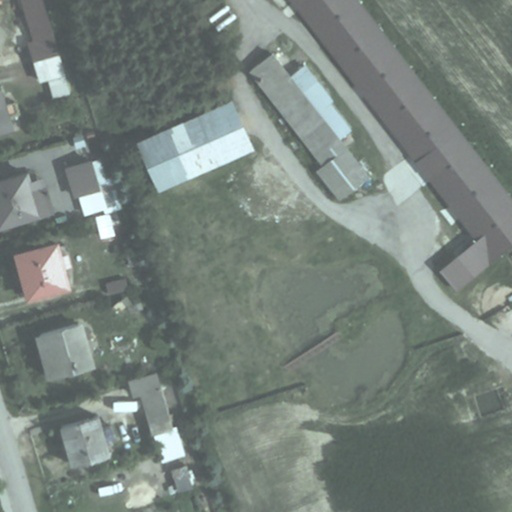

In [3]:
image = Image.open(imgPath)
image

In [4]:
image.size

(512, 512)

In [7]:
mask = Image.open(maskPath)
numpyMask = np.array(mask)
numpyMask.shape

(512, 512, 3)

In [8]:
# for w in range(512):
    
#     for h in range(512):

#         print('{} for w = {} and h = {}'.format(numpyMask[w, h, :], w, h))

four classes:
**building (1), woodland (2), water (3), and road (4)**

In [9]:
numpyMask[1,1,:]

array([0, 0, 0], dtype=uint8)

In [10]:
numpyImg = np.array(image)

In [11]:
for w in range(512):
    
    for h in range(512):
        
        # background (not classified to any class)
        if numpyMask[w, h, 0] == 0:
            numpyMask[w, h, :] = [0, 0, 0]  # black
        
        # buildings
        elif numpyMask[w, h, 0] == 1:
            numpyMask[w, h, :] = [0, 0, 255]  # blue
        
        # woodland
        elif numpyMask[w, h, 0] == 2:
            numpyMask[w, h, :] = [0, 255, 0]  # green
        
        # water
        elif numpyMask[w, h, 0] == 3:
            numpyMask[w, h, :] = [255, 0, 0]  # red
        
        # roads
        elif numpyMask[w, h, 0] == 4:
            numpyMask[w, h, :] = [255, 255, 255]  # white
        

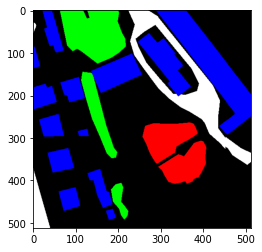

In [12]:
plt.imshow(numpyMask)
plt.show()

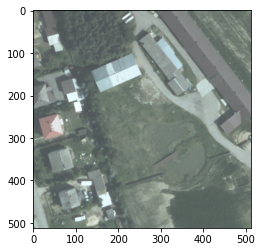

In [13]:
plt.imshow(numpyImg)